<a href="https://colab.research.google.com/github/alanasofia12/Analitica1/blob/main/Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** RETO #3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Este es el graficador

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Librerias para el modelo:
from sklearn.cluster import KMeans #Metodod de cluterizacion - KMeans
from sklearn.metrics import confusion_matrix


1.Seleccion de las respectiva variables

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


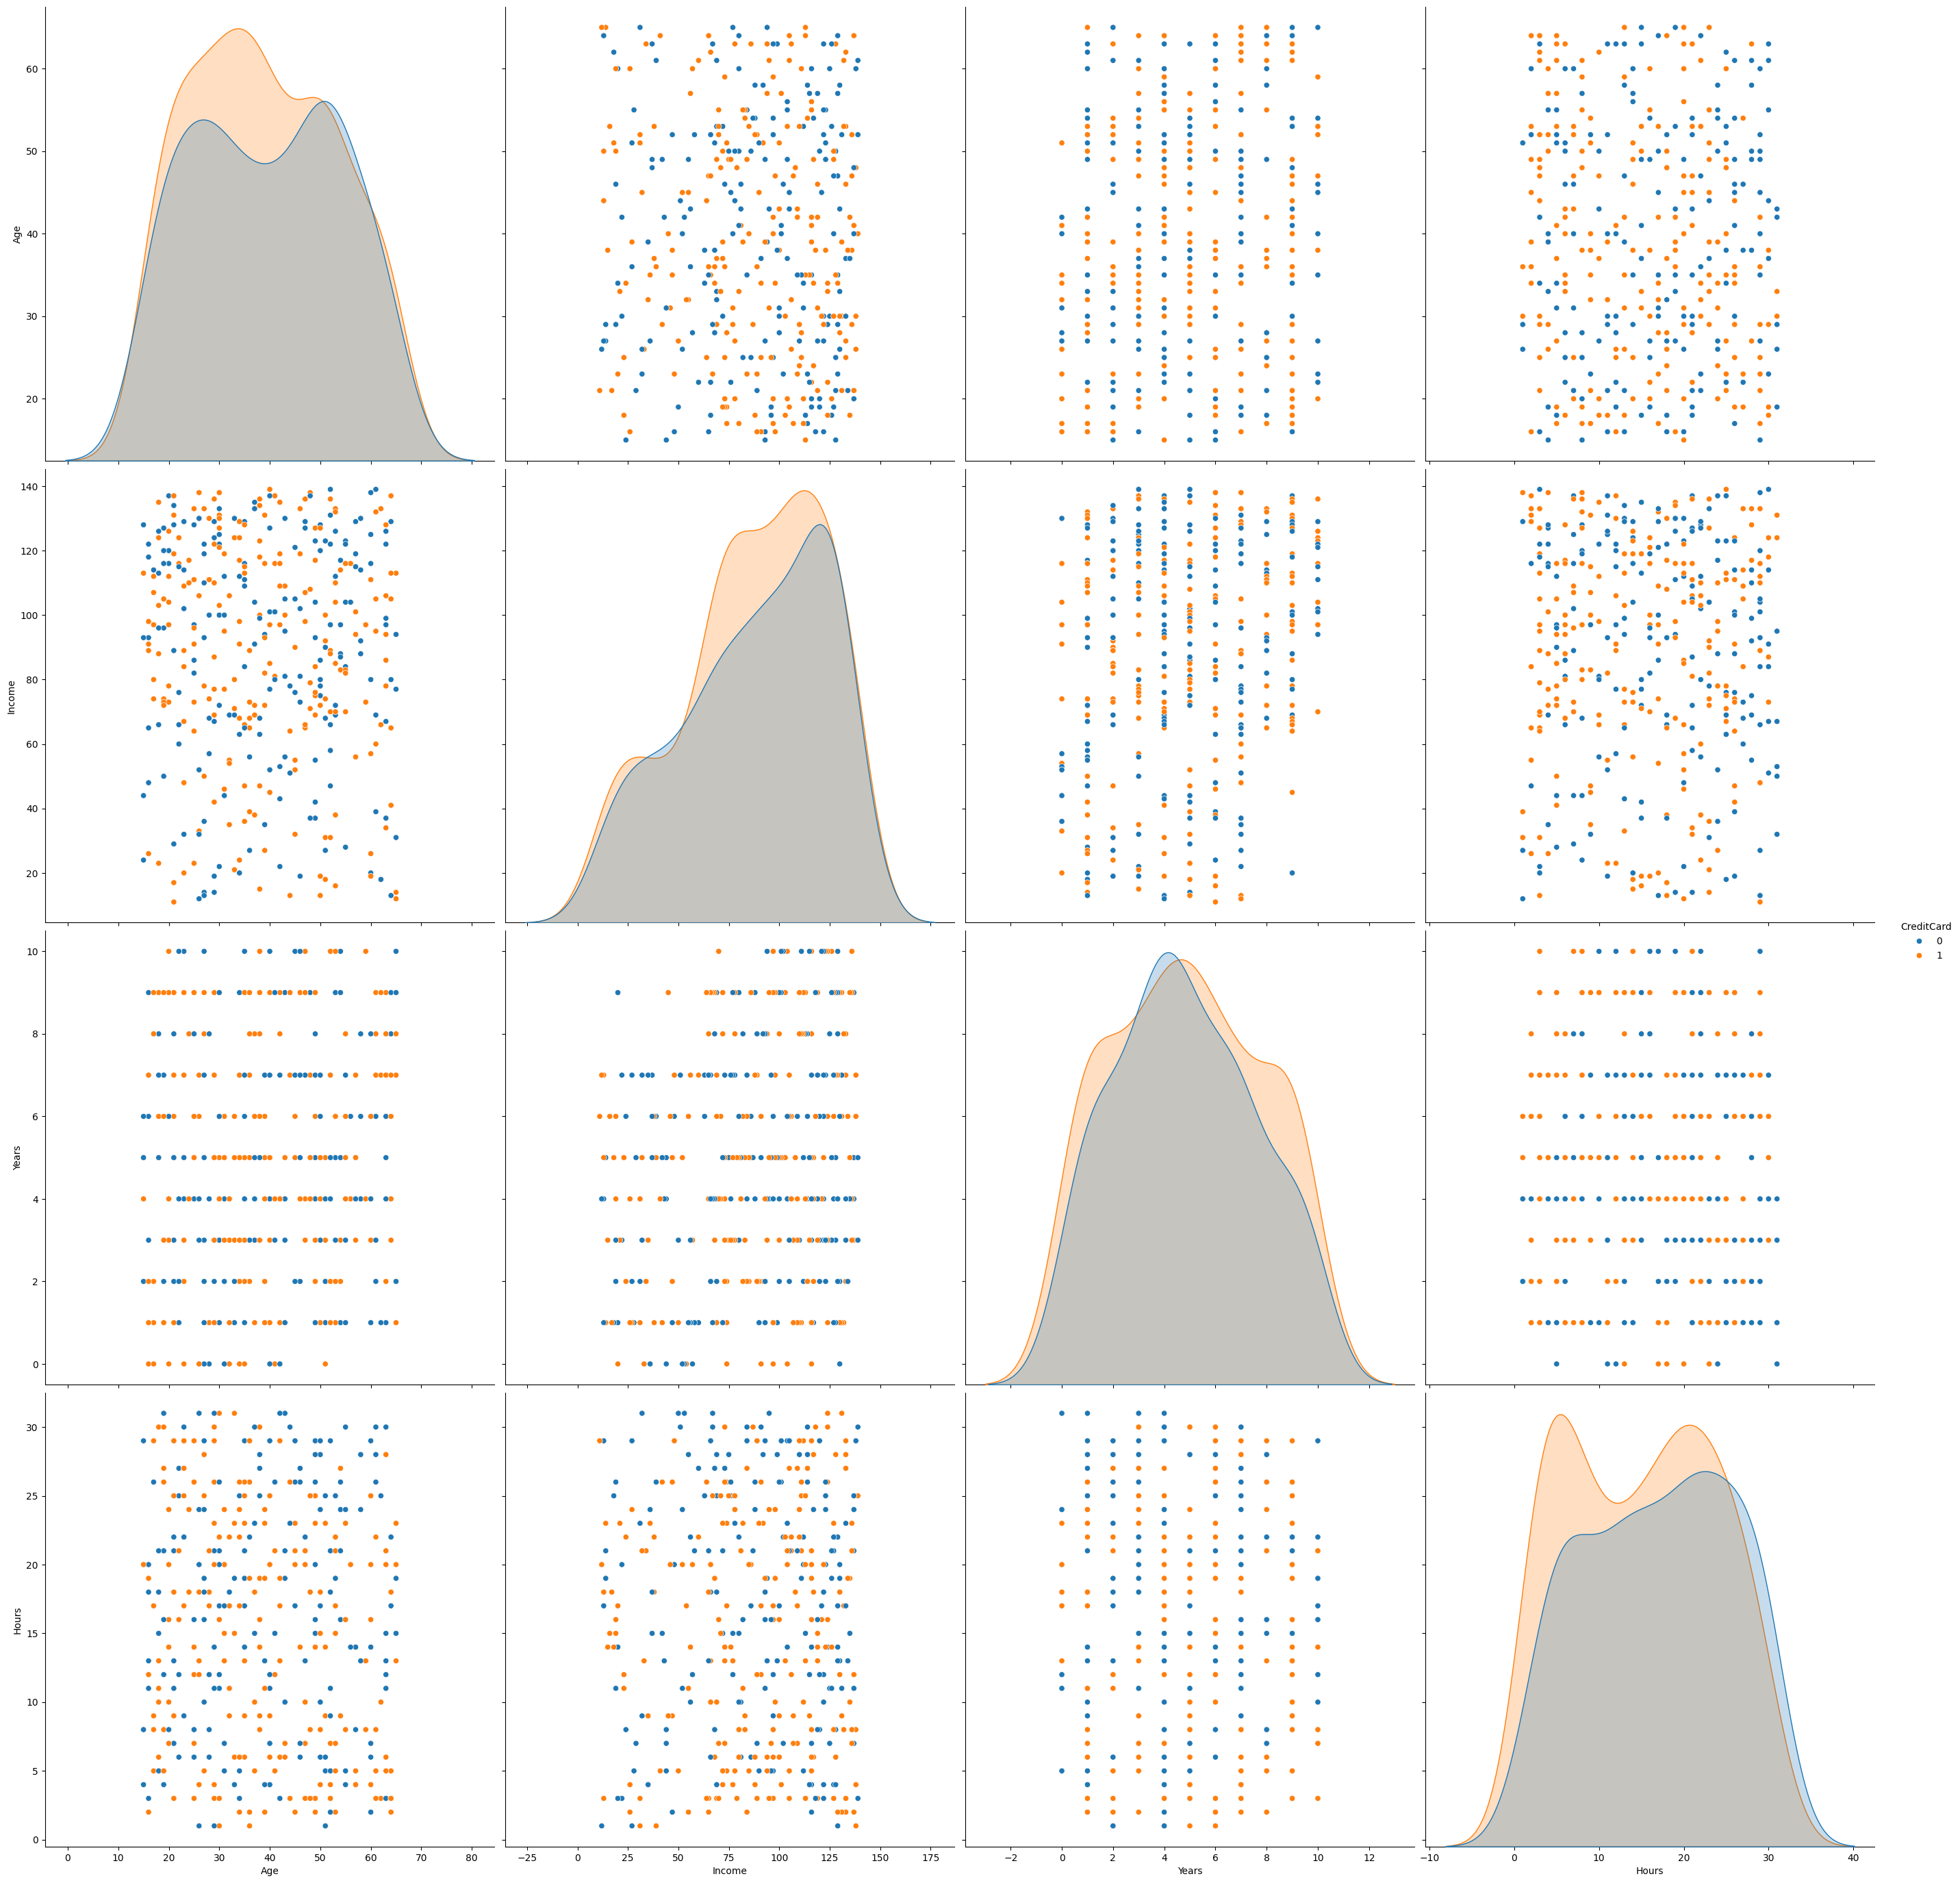

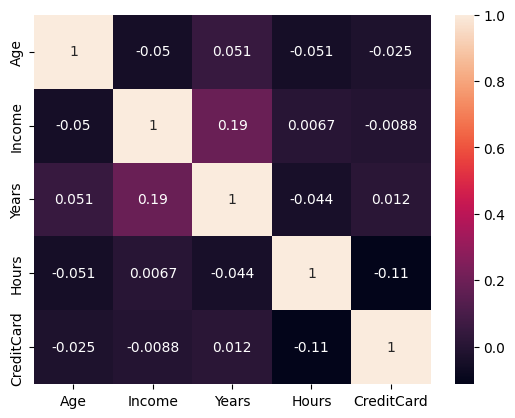

In [ ]:

nxl = '/content/3. BD2_In_App_Pur_L_Int.xlsx'
XDB=pd.read_excel(nxl)
XDB.head()

#Selecionamoas las variables
XDB=XDB[['Age','Income','Years','Hours','CreditCard']]
XDB.dropna(inplace=True)

#Seleccionamos los datos de entrada y salida:
XDB=XDB[['Age','Income','Years','Hours','CreditCard']]
XDB.dropna()

#Seleccionamos los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:4])
yd=np.array(XDB.iloc[:,4])

#Graficos de correlacion
import seaborn as sns

sns.pairplot(XDB, hue='CreditCard',size=7,vars=['Age','Income','Years','Hours'])
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()


Las variables de entra que tiene mejor co-relacion entre ellas es years con income de 0,19

,Age,Income,Years,Hours
0,49.929577,94.295775,5.267606,15.197183
1,40.417910,28.253731,3.791045,14.641791
2,24.979381,117.597938,5.164948,16.432990
3,51.030769,126.153846,5.323077,15.369231
4,36.690000,69.260000,4.630000,17.110000


Los clusters que pertenece una persona son:
 [3 2 3 3 2 2 2 3 2 3 3 3 2 3 2 2 2 2 2 3 3 2 2 2 2 3 2 3 3 3 2 3 2 2 3 2 3
 2 2 3 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 4 0 4 0 4 0 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 2 2 3 3 3 3 3 3 2 3 2 3 3 2 2 3 3 2 3 2 3 3 2 3 2 2 3 3 2 3 2
 2 3 2 2 3 3 3 2 2 2 3 3 3 2 2 2 3 3 3 3 2 3 3 2 2 3 3 2 2 3 2 3 2 2 3 3 2
 2 2 2 2 2 3 3 2 2 3 2 3 2 2 3 3 2 3 2 2 3 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 0
 0 0 0 0 2 2 2 0 0 0 0 2 0 0 2 0 0 2 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0
 4 0 4 0 4 4 0 0 4 0 4 0 0 0 0 0 0 4 0 4 0 4 0 4 4 0 0 4 4 0 4 0 4 4 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


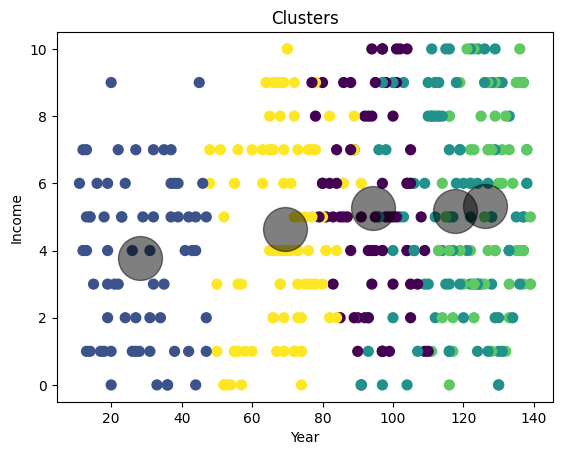

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
np.random.seed(42)  #se garantiza los mismo numeros aleatoreos
NC=5 #Numero de clusters
mkm=KMeans(n_clusters=NC,init= 'random',random_state=42)
mkm.fit(XD,yd)

#cuales son los graficos creados
mkm.cluster_centers_

#cuales son los graficos creados
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=['Age','Income','Years','Hours']
display(dfc)


#A que sucursal o cluster pertenece una persona
ydc=mkm.predict(XD)
print("Los clusters que pertenece una persona son:\n", ydc)
#Se proceede con la grafica de los clusters
centroids=mkm.cluster_centers_
plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(centroids[:,1],centroids[:,2],c='black',s=1000,alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Clusters')
plt.show()

El cluster que tiene mayor ingreso es 3(126.153846)
El cluster que tiene mayor edad es 3(51)
El clusrer que tiene mayor años es el 3(5.323077)
El cluster que tiene mayor hora es el 4(17.110000)

In [ ]:
#se determina el porcentanje de preaprobacion por categoria cluster
ND=np.bincount(ydc)
XDB['cluster']=ydc
display(XDB) #se determina el porcentanje de preaprobacion por categoria cluster

#numero de personas aprobada por sucursal o cluster
NApr=XDB.groupby('cluster').agg({'CreditCard':lambda x:(x==1).sum()})
NAprp=np.array(NApr)/ND[:,None]
Nneg=XDB.groupby('cluster').agg({'CreditCard':lambda x:(x==0).sum()})
Nnegp=np.array(Nneg)/ND[:,None]
#numero de personas aprobada por sucursal o cluster

df2=pd.DataFrame(np.column_stack((ND,NApr,Nneg,NAprp,Nnegp)))
df2.columns=['ND','NApr','Nneg','%Apr','%Neg']
display(df2)
 #evaluamos el modelo utilizando la matriz de confusion

,Age,Income,Years,Hours,CreditCard,pronostico,cluster
0,40,139,3,25,1,0.0,3
1,26,138,7,4,1,1.0,2
2,48,138,7,8,1,0.0,3
3,60,138,6,29,0,0.0,3
4,21,137,5,21,0,1.0,2
...,...,...,...,...,...,...,...
395,36,65,8,2,1,1.0,4
396,64,65,7,18,1,1.0,4
397,35,65,7,21,0,1.0,4
398,25,64,9,3,1,1.0,4


,ND,NApr,Nneg,%Apr,%Neg
0,71.0,38.0,33.0,0.535211,0.464789
1,67.0,35.0,32.0,0.522388,0.477612
2,97.0,52.0,45.0,0.536082,0.463918
3,65.0,31.0,34.0,0.476923,0.523077
4,100.0,57.0,43.0,0.570000,0.430000


El cluster que posse mayores datos (ND) es el 4 con 100.0
El cluster con mayor aprob% es el 4 con 0.57


In [ ]:
ydp=np.zeros((len(ydc),1))

for k in range(len(ydp)):
  print('la persona:',k)
  print('pertenece al cluster', ydc[k])
  ncl=ydc[k]
  print('porcentaje de negación es:',Nnegp[ncl])
  print('porcentaje de aprobacion es:',NAprp[ncl])

  if NAprp[ncl]>Nnegp[ncl]:
    print('se aprueba')
    ydp[k]=1
  else:
      print('se niega')
      ydp[k]=0

XDB['pronostico']=ydp
display(XDB)
XDB.to_excel('InformeCluster.xlsx')

la persona: 0
pertenece al cluster 3
porcentaje de negación es: [0.52307692]
porcentaje de aprobacion es: [0.47692308]
se niega
la persona: 1
pertenece al cluster 2
porcentaje de negación es: [0.46391753]
porcentaje de aprobacion es: [0.53608247]
se aprueba
la persona: 2
pertenece al cluster 3
porcentaje de negación es: [0.52307692]
porcentaje de aprobacion es: [0.47692308]
se niega
la persona: 3
pertenece al cluster 3
porcentaje de negación es: [0.52307692]
porcentaje de aprobacion es: [0.47692308]
se niega
la persona: 4
pertenece al cluster 2
porcentaje de negación es: [0.46391753]
porcentaje de aprobacion es: [0.53608247]
se aprueba
la persona: 5
pertenece al cluster 2
porcentaje de negación es: [0.46391753]
porcentaje de aprobacion es: [0.53608247]
se aprueba
la persona: 6
pertenece al cluster 2
porcentaje de negación es: [0.46391753]
porcentaje de aprobacion es: [0.53608247]
se aprueba
la persona: 7
pertenece al cluster 3
porcentaje de negación es: [0.52307692]
porcentaje de aprob

la persona pertenece al cluster [2]
el porcentaje de preapro es: [[0.53608247]]
el porcentaje de preneg es: [[0.46391753]]


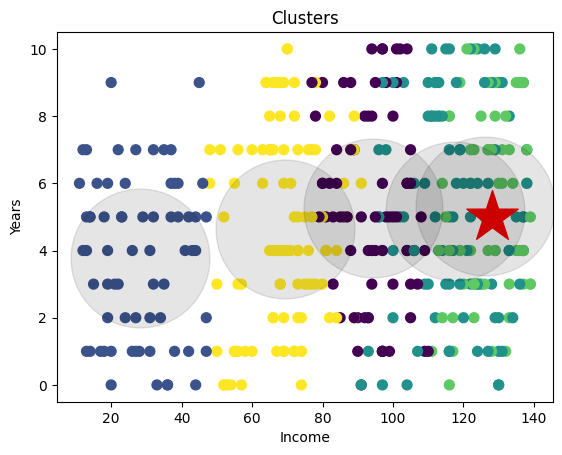

la persona pertenece al cluster [3]
el porcentaje de preapro es: [[0.47692308]]
el porcentaje de preneg es: [[0.52307692]]


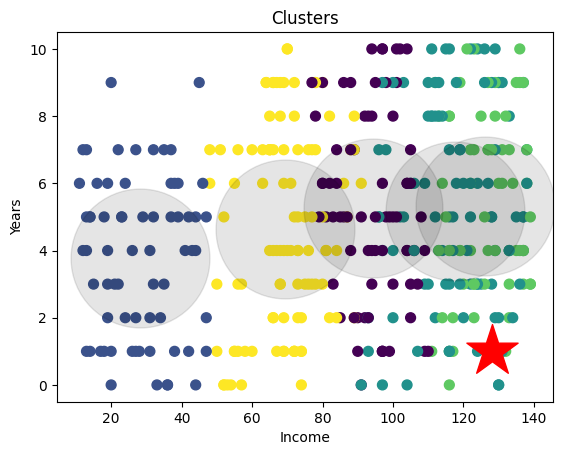

In [ ]:

#evaluamos una persona nueva de las pagina dos
XDN=np.array([21,128,5,4])
#evaluamos una persona nueva
XDN=np.array([21,128,5,4])
ydn=mkm.predict(XDN.reshape(1,-1))
print('la persona pertenece al cluster',ydn)
print('el porcentaje de preapro es:',NAprp[ydn])
print('el porcentaje de preneg es:',Nnegp[ydn])
plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(XDN[1],XDN[2],marker='*',s=1500,facecolors='red')
plt.scatter(dfc.iloc[:,1],dfc.iloc[:,2],c='black',s=10000,alpha=0.1)
plt.xlabel('Income')
plt.ylabel('Years')
plt.title('Clusters')
plt.show()

#evaluamos una persona nueva de las pagina dos
XDN=np.array([50,128,1,6])
#evaluamos una persona nueva
XDN=np.array([50,128,1,6])
ydn=mkm.predict(XDN.reshape(1,-1))
print('la persona pertenece al cluster',ydn)
print('el porcentaje de preapro es:',NAprp[ydn])
print('el porcentaje de preneg es:',Nnegp[ydn])
plt.figure()

plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(XDN[1],XDN[2],marker='*',s=1500,facecolors='red')
plt.scatter(dfc.iloc[:,1],dfc.iloc[:,2],c='black',s=10000,alpha=0.1)
plt.xlabel('Income')
plt.ylabel('Years')
plt.title('Clusters')
plt.show()



la persona pertenece al cluster [3]
el porcentaje de preapro es: [[0.47692308]]
el porcentaje de preneg es: [[0.52307692]]


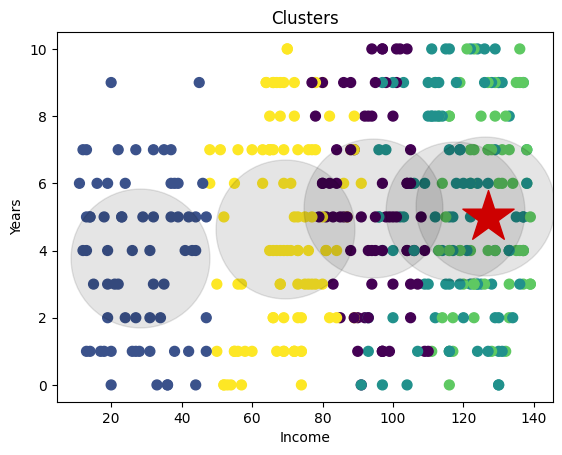

In [ ]:
#evaluamos una persona nueva
XDN=np.array([40,127,5,4])
#evaluamos una persona nueva
XDN=np.array([40,127,5,4])
ydn=mkm.predict(XDN.reshape(1,-1))
print('la persona pertenece al cluster',ydn)
print('el porcentaje de preapro es:',NAprp[ydn])
print('el porcentaje de preneg es:',Nnegp[ydn])

plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(XDN[1],XDN[2],marker='*',s=1500,facecolors='red')
plt.scatter(dfc.iloc[:,1],dfc.iloc[:,2],c='black',s=10000,alpha=0.1)
plt.xlabel('Income')
plt.ylabel('Years')
plt.title('Clusters')
plt.show()

In [ ]:
#Análisis del desempeño
cm=confusion_matrix(yd,ydp)

In [ ]:
sensibilidad=cm[1,1]/(cm[1,1]+cm[1,0])
print('La sensibilidad es:',sensibilidad)
exactitud=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print('La exactitud es:',exactitud)
especifidad=cm[0,0]/(cm[0,0]+cm[0,1])
print('La especifidad es:',especifidad)
precision=cm[1,1]/(cm[1,1]+cm[0,1])
print('La precisión es:',precision)
TasaError=(cm[0,1]+cm[1,0])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print('La tasa de error es:',TasaError)
PredNeg=cm[0,0]/(cm[0,0]+cm[0,1])
print('La tasa de predicción negativa es:',PredNeg)

La sensibilidad es: 0.8544600938967136
La exactitud es: 0.54
La especifidad es: 0.18181818181818182
La precisión es: 0.5432835820895522
La tasa de error es: 0.46
La tasa de predicción negativa es: 0.18181818181818182


**CONCLUCION**
Para este estudio de credito se tomo las siguientes variables: INCOME,YEARS,AGE y HOUR donde las que mas tiene correlacion son ingresos y egresos con 19% mas con la variable CreditCard(salida) fue de 12%, siendo asi la variable mas relevante.

Para este modelo se tomaron 5
El cluster que tiene mayor ingreso es 3(126.153846) El cluster que tiene mayor edad es 3(51) El clusrer que tiene menor años es el 1(3.79 El cluster que tiene mayor cantidad horas es el 4(17.110000), adicionalmente el modelo tiene una precision de 0,54, con una sensibilidad de 0,84 y una tasa de erro bastante alta.
